In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
data.shape

(39644, 61)

In [4]:
data.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [5]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
data.drop(columns = ['url'] ,inplace=True)
data.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


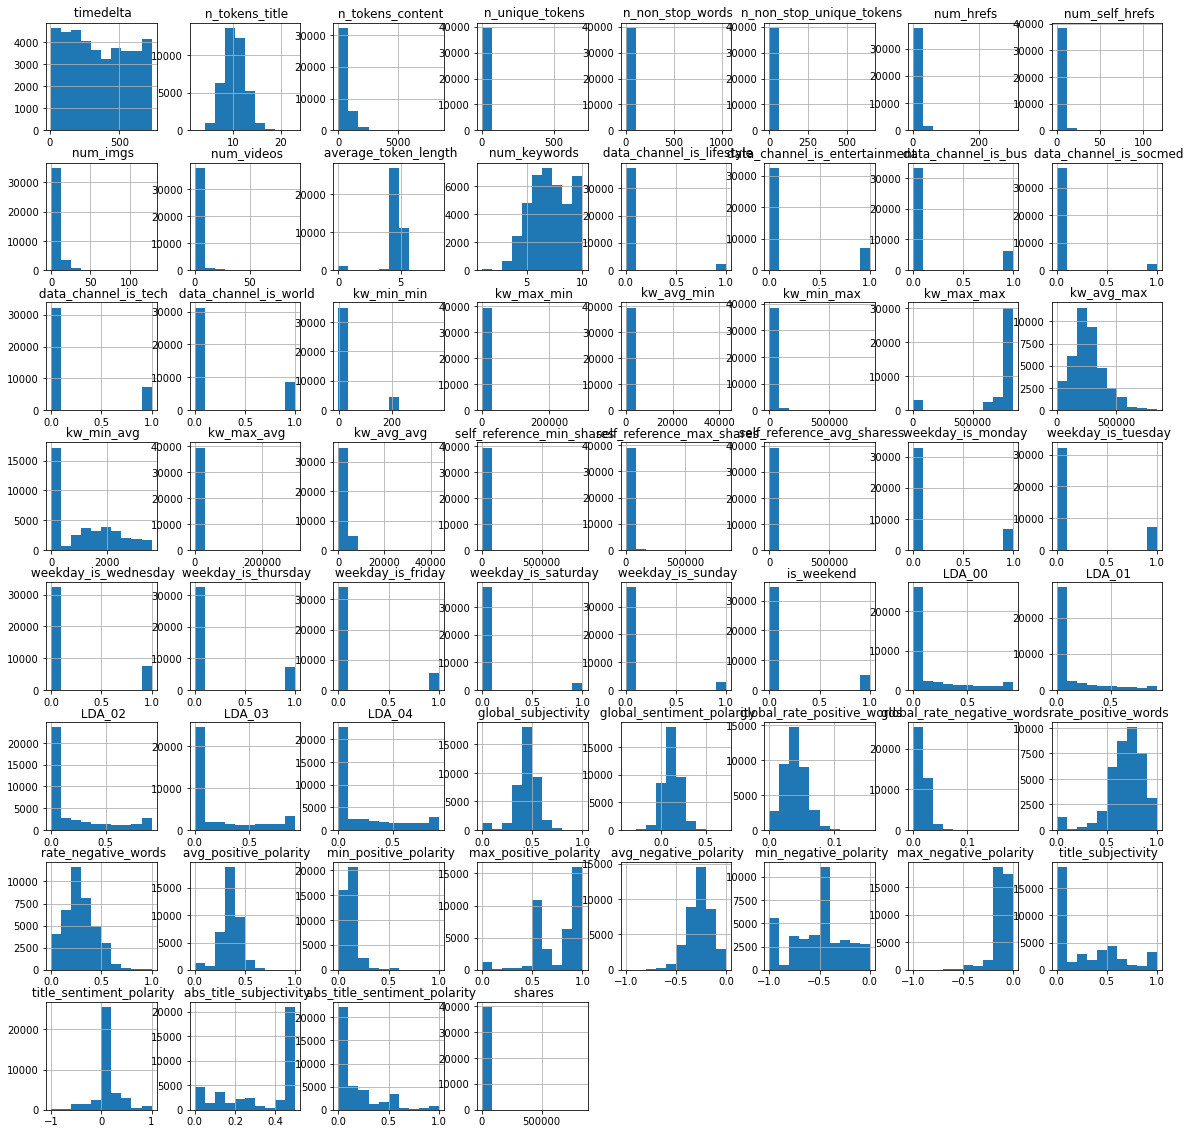

In [7]:
data.hist(figsize=(20,20))
plt.show()

# chck correlation

/var/folders/nb/s2fx_kf54nv8fpngr1jppkjh0000gn/T/ipykernel_26734/2963683346.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot:>

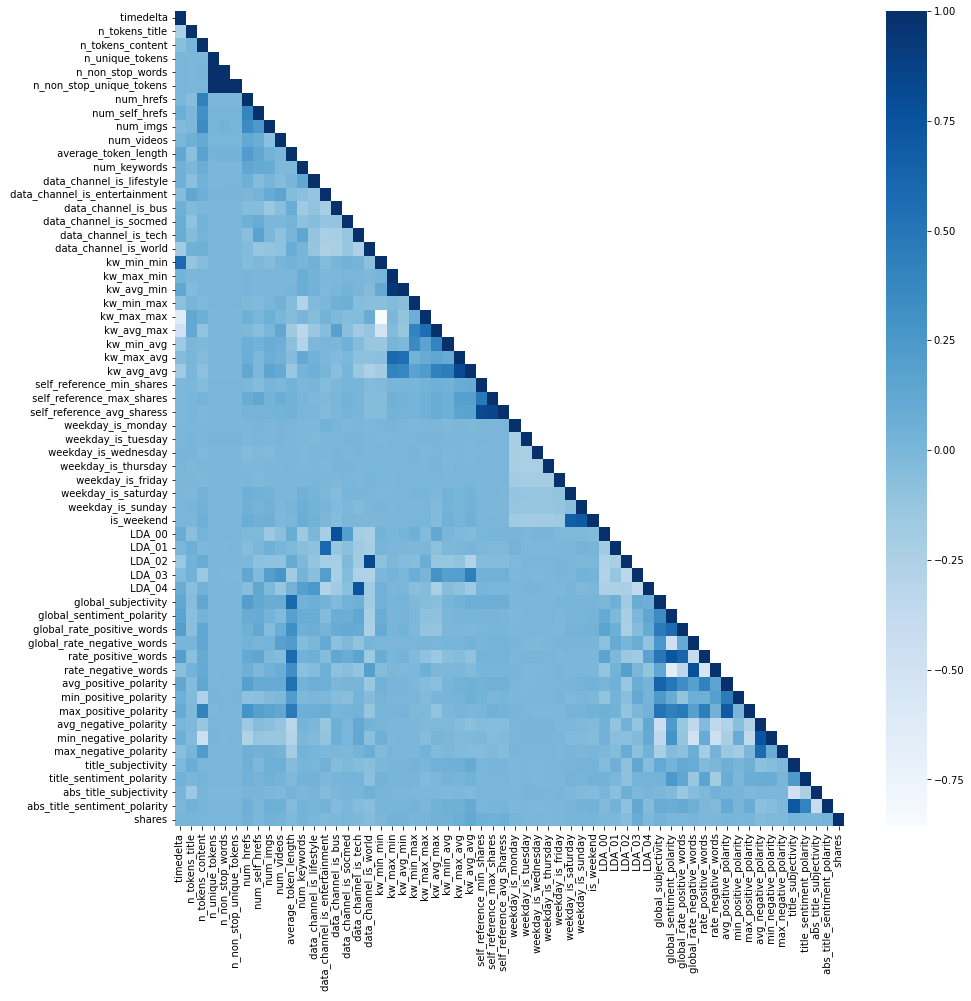

In [8]:
cor=data.corr()
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [9]:
cor.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


In [10]:
most = cor[abs(cor) > .75].dropna(thresh=2,axis = 0)
most

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_unique_tokens,NaN,NaN,NaN,1.000000,0.999572,0.999852,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_non_stop_words,NaN,NaN,NaN,0.999572,1.000000,0.999532,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_non_stop_unique_tokens,NaN,NaN,NaN,0.999852,0.999532,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_channel_is_bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_channel_is_world,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_min_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_max_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_avg_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_max_max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kw_max_avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
firstData = data
deleteColumns = most.index
firstData

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [12]:
newData = data.drop(columns=deleteColumns)
newData.head(10)

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,731.0,10.0,370.0,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,731.0,8.0,960.0,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,731.0,12.0,989.0,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,731.0,11.0,97.0,2.0,0.0,0.0,0.0,4.855670,7.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,731.0,10.0,231.0,4.0,1.0,1.0,1.0,5.090909,5.0,0.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


/var/folders/nb/s2fx_kf54nv8fpngr1jppkjh0000gn/T/ipykernel_26734/132436370.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot:>

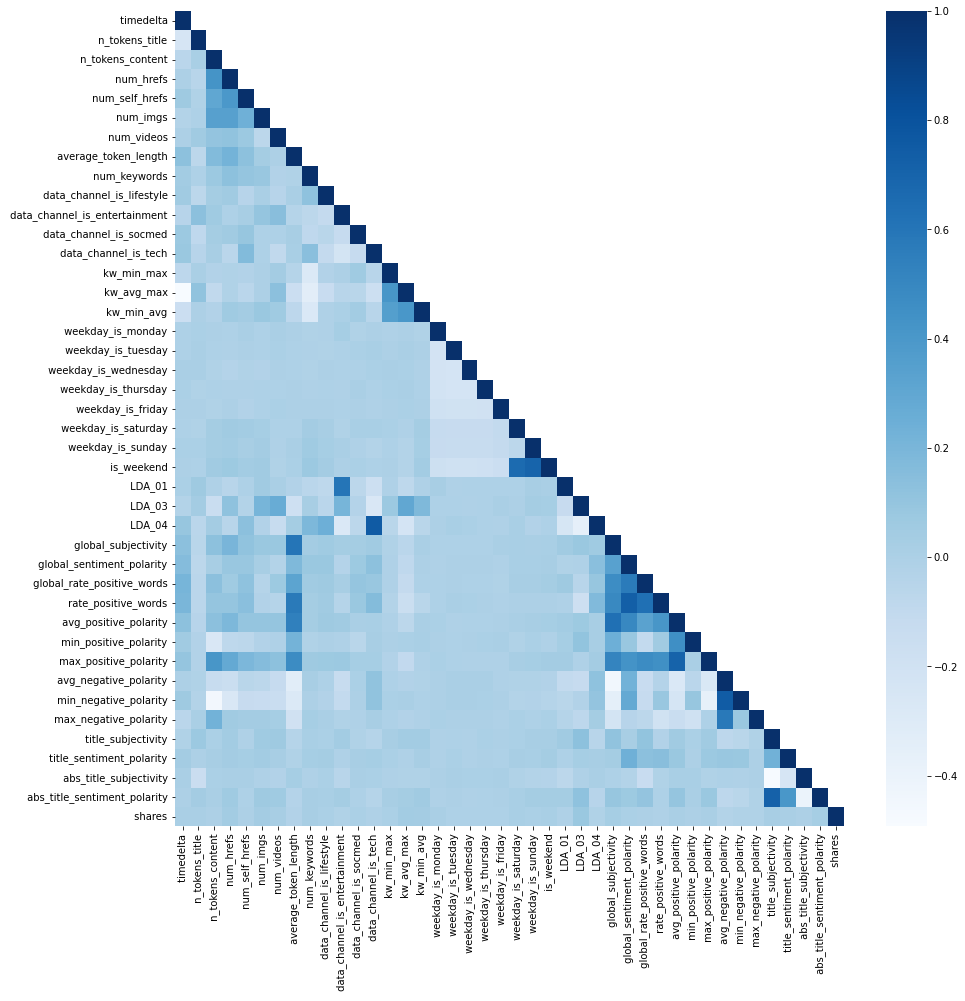

In [13]:
cor=newData.corr()
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [14]:
cor.describe()

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.034100,0.008213,0.064774,0.081476,0.076387,0.064913,0.043636,0.075931,0.030468,0.030222,...,0.036202,0.122271,0.004548,-0.005477,0.019147,0.050758,0.063944,-0.015323,0.060611,0.031327
std,0.191452,0.169271,0.214234,0.197154,0.177856,0.176596,0.169946,0.249988,0.183703,0.166917,...,0.187046,0.250089,0.250588,0.244386,0.196936,0.208690,0.174384,0.191363,0.208327,0.154685
min,-0.493093,-0.240320,-0.450603,-0.263576,-0.122071,-0.136522,-0.138190,-0.324529,-0.332221,-0.132091,...,-0.261493,-0.360871,-0.443187,-0.450603,-0.223191,-0.487172,-0.240112,-0.487172,-0.400272,-0.032029
25%,-0.006042,-0.052527,-0.009142,-0.012255,-0.013652,-0.008550,-0.015685,-0.033217,-0.015470,-0.022059,...,-0.015079,-0.009659,-0.096128,-0.094370,-0.022054,-0.011136,-0.000293,-0.021473,-0.004177,-0.006927
50%,0.004325,-0.007468,0.024383,0.047937,0.032688,0.025026,0.008097,0.002589,0.023130,0.006346,...,0.002526,0.039379,-0.019732,-0.014914,-0.002713,0.018990,0.025068,-0.008552,0.022358,0.005426
75%,0.073348,0.010899,0.102514,0.111304,0.111358,0.076177,0.069474,0.129568,0.061534,0.047530,...,0.023987,0.147839,0.007780,0.014018,0.020879,0.052683,0.044493,0.008738,0.056202,0.020603
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# most correlation with shares

In [15]:
mostSharesCorrelation = cor[abs(cor[' shares']) >= .02]
mostSharesCorrelation

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
num_hrefs,-0.000832,-0.053496,0.423065,1.000000,0.396452,0.342633,0.114518,0.222588,0.125890,0.052906,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_imgs,-0.027636,-0.008858,0.342600,0.342633,0.238586,1.000000,-0.067336,0.033924,0.088432,0.010260,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,0.114518,0.077458,-0.067336,1.000000,-0.002940,-0.022257,-0.044602,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936
average_token_length,0.130465,-0.071403,0.167789,0.222588,0.126879,0.033924,-0.002940,1.000000,-0.016814,0.011161,...,0.222207,0.471383,-0.324529,-0.278784,-0.194660,-0.040406,-0.016718,0.026586,-0.036953,-0.022007
num_keywords,0.046884,-0.006077,0.072845,0.125890,0.099578,0.088432,-0.022257,-0.016814,1.000000,0.124578,...,-0.015890,0.062440,0.021114,-0.002656,0.028036,0.016014,0.031705,-0.010992,0.023533,0.021818
kw_avg_max,-0.493093,0.115746,-0.096460,-0.019269,-0.064747,0.002217,0.136228,-0.157419,-0.332221,-0.132091,...,0.006972,-0.097967,-0.021485,0.014258,-0.022972,0.047235,-0.010713,-0.015096,0.035188,0.044686
kw_min_avg,-0.157204,-0.002370,-0.022286,0.058920,0.039239,0.081029,0.058866,-0.076706,-0.272042,-0.010045,...,0.015884,-0.012181,-0.020031,-0.004458,-0.009388,0.045342,0.024973,-0.016834,0.054769,0.039551
LDA_03,-0.030838,0.042208,-0.140141,0.123786,-0.028775,0.208924,0.267673,-0.181714,0.022726,-0.063131,...,0.108755,-0.014059,-0.114381,-0.025578,-0.074780,0.129062,0.027687,-0.013784,0.122120,0.083771
global_subjectivity,0.133837,-0.056804,0.127879,0.203464,0.115285,0.080468,0.082052,0.597629,0.038603,0.060423,...,0.243984,0.518773,-0.443187,-0.350070,-0.223191,0.114123,0.034075,-0.003758,0.091067,0.031604
avg_negative_polarity,-0.000507,-0.017096,-0.130375,-0.152146,-0.058222,-0.072500,-0.115976,-0.324529,0.021114,-0.006529,...,-0.063571,-0.268784,1.000000,0.748896,0.580108,-0.075814,0.085878,-0.006573,-0.075594,-0.032029


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


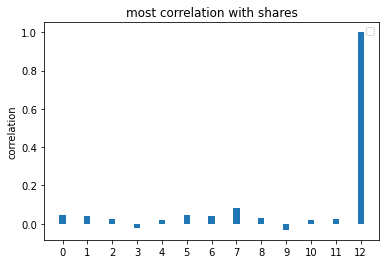

<Figure size 1440x2160 with 0 Axes>

In [16]:
x = np.arange(len(mostSharesCorrelation[' shares']))
width = .25
fig, ax = plt.subplots()
ax.bar(x,mostSharesCorrelation[' shares'],width)
labels = mostSharesCorrelation[' shares'].index
ax.set_ylabel('correlation')
ax.set_title("most correlation with shares")
ax.set_xticks(x)
ax.legend()
plt.figure(figsize=(20,30))
plt.show()

# Set New Data

In [109]:
#data = newData
data = firstData
originData = newData
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Before Removing The Outliers

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' timedelta', ylabel=' shares'>

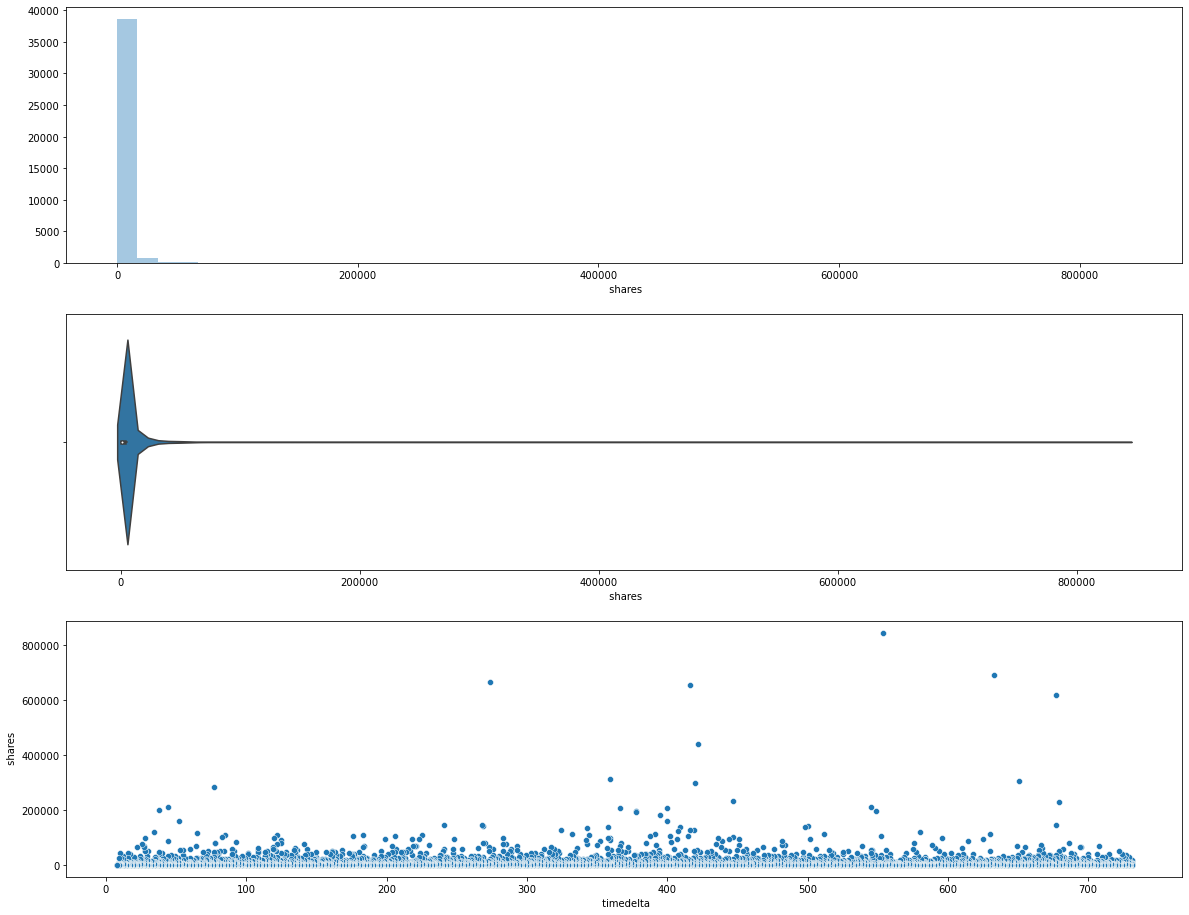

In [110]:
plt.subplots(3,1,figsize=(20,16))
plt.subplot(3,1,1)
sns.distplot(data[' shares'], hist=True, kde=False)
plt.subplot(3,1,2)
sns.violinplot(data[' shares'])
plt.subplot(3,1,3)
sns.scatterplot(data=data, x=' timedelta', y=' shares')

# find outlier records 

### IQR

In [111]:
for column in data.columns:    
    q1 = data[column].quantile(0.25)    # First Quartile
    q3 = data[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    df = data[(data[column] > llimit) & (data[column] < ulimit)]
    
df

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


### z-test

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' shares', ylabel='Density'>

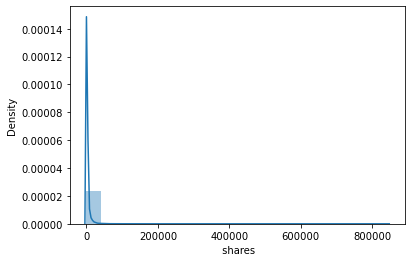

In [112]:
sns.distplot(data[' shares'], bins=20)

In [113]:
def edit(x):
    return np.log(x) + 1

temp = data.apply(edit)
temp

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,7.594413,3.484907,6.389072,0.589916,1.0,0.795905,2.386294,1.693147,1.000000,-inf,...,-1.302585,0.643325,NaN,NaN,NaN,0.306853,NaN,-inf,-0.673976,7.385194
1,7.594413,3.197225,6.541264,0.497048,1.0,0.766738,2.098612,1.000000,1.000000,-inf,...,-2.401197,0.643325,NaN,NaN,NaN,-inf,-inf,0.306853,-inf,7.566672
2,7.594413,3.197225,6.351858,0.446840,1.0,0.590324,2.098612,1.000000,1.000000,-inf,...,-1.302585,1.000000,NaN,NaN,NaN,-inf,-inf,0.306853,-inf,8.313220
3,7.594413,3.197225,7.274762,0.314400,1.0,0.592986,3.197225,-inf,1.000000,-inf,...,-0.992430,0.776856,NaN,NaN,NaN,-inf,-inf,0.306853,-inf,8.090077
4,7.594413,3.564949,7.977281,0.122078,1.0,0.385460,3.944439,3.944439,3.995732,-inf,...,-2.401197,1.000000,NaN,NaN,NaN,0.211543,-0.992430,-2.091042,-0.992430,7.224558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,3.079442,3.397895,6.846439,0.363331,1.0,0.621346,3.197225,2.945910,1.000000,1.000000,...,-1.302585,0.712318,NaN,NaN,NaN,-1.302585,-inf,0.083709,-inf,8.495542
39640,3.079442,3.484907,6.793014,0.638020,1.0,0.877897,3.197225,2.945910,2.098612,4.871201,...,-0.992430,0.643325,NaN,NaN,NaN,-0.203973,1.000000,-0.609438,1.000000,8.549609
39641,3.079442,3.302585,7.091310,0.339040,1.0,0.560142,4.178054,1.000000,3.484907,1.000000,...,-0.992430,0.306853,NaN,NaN,NaN,0.211543,-0.992430,-2.091042,-0.992430,8.549609
39642,3.079442,2.791759,7.525030,0.382875,1.0,0.632785,3.302585,1.000000,1.000000,-inf,...,-1.772589,0.306853,NaN,NaN,NaN,-inf,-inf,0.306853,-inf,8.003065


/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' shares', ylabel='Density'>

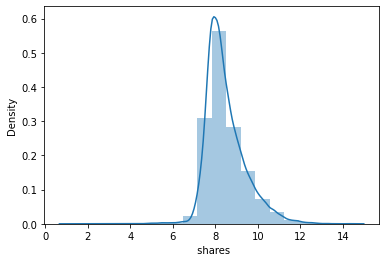

In [114]:
sns.distplot(temp[' shares'], bins=20)

In [115]:
for column in temp.columns:    
    temp[column] = (temp[column] - temp[column].mean())/temp[column].var()
    outliers = temp[(temp[column] < 3) | (temp[column] > -3)]
    
outliers

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.259303,3.699901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.258553
1,1.259303,-2.760073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.048947
2,1.259303,-2.760073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.186687
3,1.259303,-2.760073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.444417
4,1.259303,5.497281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.444087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-4.346135,1.746039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023893
39640,-4.346135,3.699901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086341
39641,-4.346135,-0.394175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086341
39642,-4.346135,-11.864895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.544915


In [116]:
outliers.shape

(39644, 60)

### Percentile

In [117]:
for column in data.columns:    
    
    lower_limit, upper_limit = np.percentile(a=data[column],q=[1,99])

    tempData = data[(data[column] > lower_limit) & (data[column] < upper_limit)]
    
tempData

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [118]:
tempData.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,...,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000
mean,353.963654,10.401889,546.937450,0.548187,0.996937,0.689150,10.859121,3.314577,4.541146,1.250071,...,0.095231,0.756511,-0.259162,-0.521305,-0.107377,0.282123,0.071515,0.341857,0.155889,2708.085356
std,214.147890,2.110251,471.152161,3.556495,5.284436,3.297980,11.291371,3.862650,8.307799,4.113629,...,0.071018,0.247880,0.127639,0.290300,0.095237,0.324135,0.265137,0.188837,0.226076,3657.048144
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,382.000000
25%,164.000000,9.000000,247.000000,0.470588,1.000000,0.625551,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.327961,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,954.000000
50%,338.000000,10.000000,410.000000,0.538922,1.000000,0.690096,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.252932,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000
75%,541.000000,12.000000,717.000000,0.608163,1.000000,0.754237,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186243,-0.300000,-0.050000,0.500000,0.148182,0.500000,0.250000,2700.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,31600.000000


# Set New Data

In [119]:
data = tempData
Columns = data.columns
data
#data = df
#Columns = df.columns
#data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


### After Removing The Outliers

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' timedelta', ylabel=' shares'>

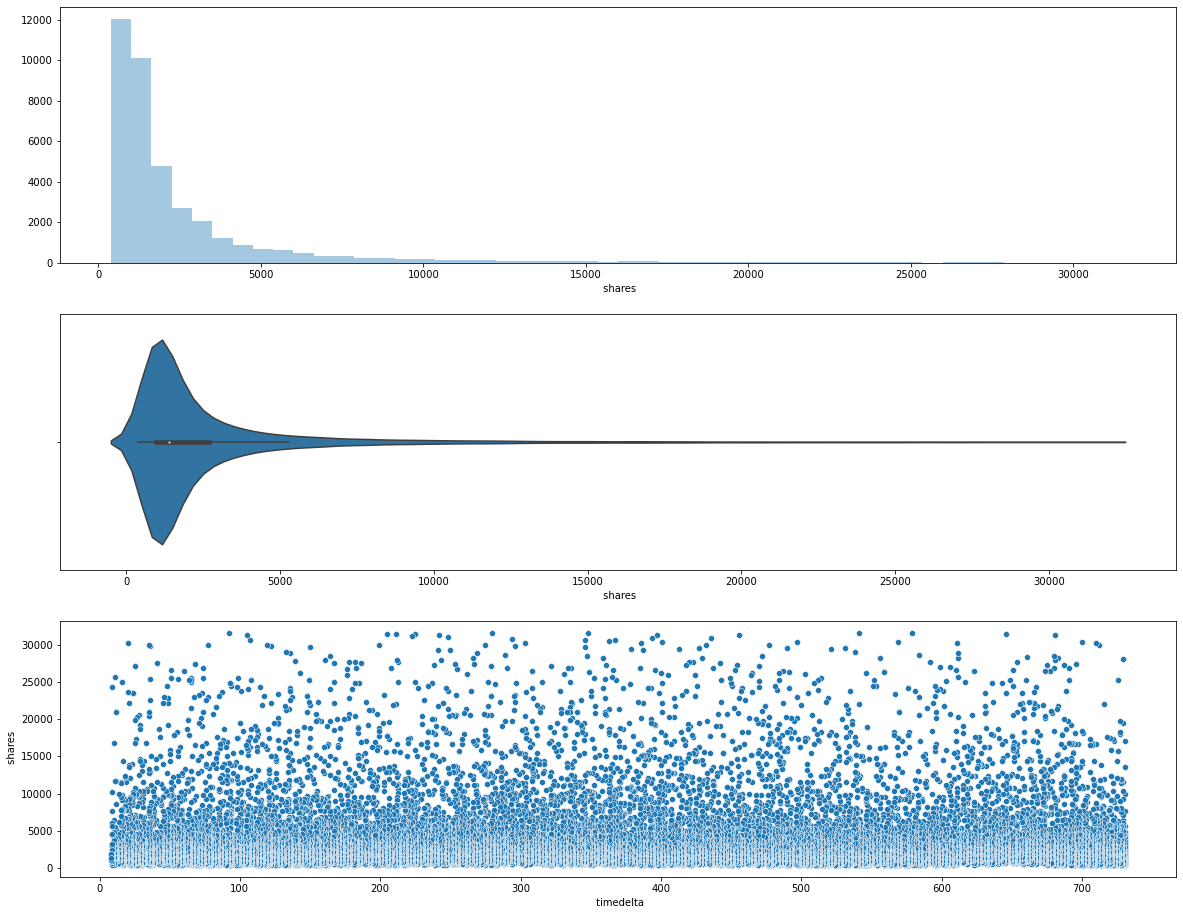

In [120]:
plt.subplots(3,1,figsize=(20,16))
plt.subplot(3,1,1)
sns.distplot(data[' shares'], hist=True, kde=False)
plt.subplot(3,1,2)
sns.violinplot(data[' shares'])
plt.subplot(3,1,3)
sns.scatterplot(data=data, x=' timedelta', y=' shares')

# Scaling

### Quantile Transformer

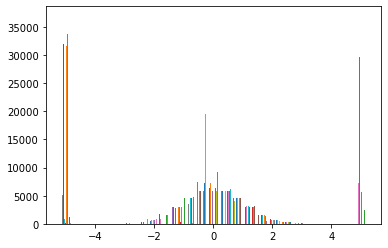

In [121]:
quantile = QuantileTransformer(output_distribution='normal')
qtdata = quantile.fit_transform(data)
plt.hist(qtdata, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


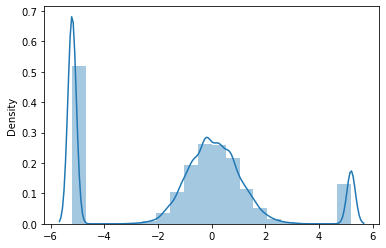

In [122]:
sns.distplot(qtdata, bins=20);

### power transformer 

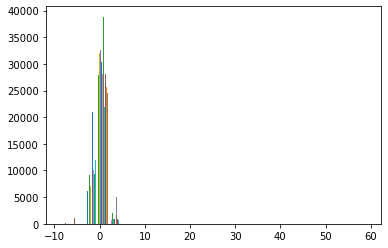

In [123]:
pt = PowerTransformer()
pdata = pt.fit_transform(data)
plt.hist(pdata, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


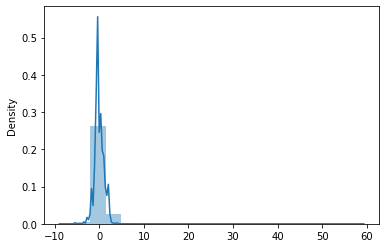

In [124]:
sns.distplot(pdata, bins=20);

### min-max-transformer

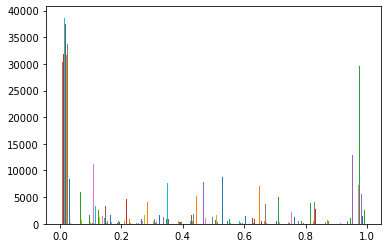

In [125]:
min_max = MinMaxScaler()
min_max_data = min_max.fit_transform(data)
plt.hist(min_max_data, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


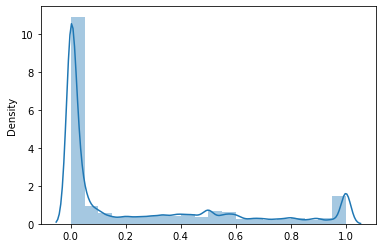

In [126]:
sns.distplot(min_max_data, bins=20);

### RobustScaler

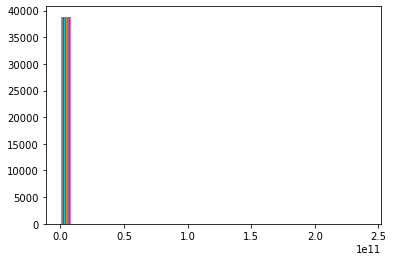

In [127]:
r_scaler = RobustScaler()
r_data = r_scaler.fit_transform(data)
plt.hist(r_data, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


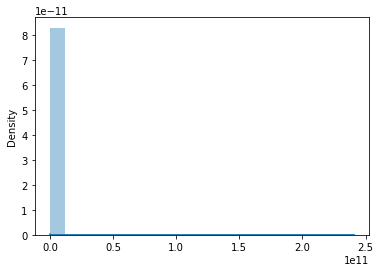

In [128]:
sns.distplot(r_data, bins=20);

### StandardScaler

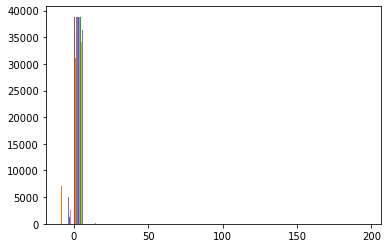

In [129]:
s_scaler  = StandardScaler()
s_data = s_scaler.fit_transform(data)
plt.hist(s_data, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


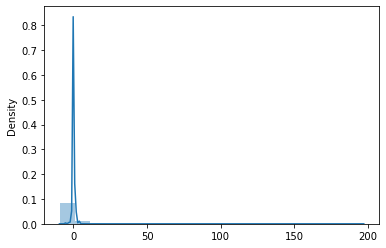

In [130]:
sns.distplot(s_data, bins=20);

# Scaling by Quantile Data

### min-max

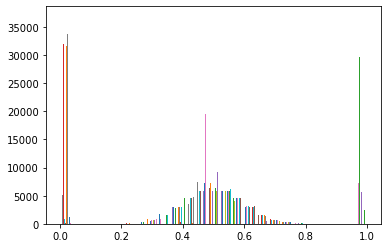

In [131]:
min_max = MinMaxScaler()
min_max_data = min_max.fit_transform(qtdata)
plt.hist(min_max_data, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


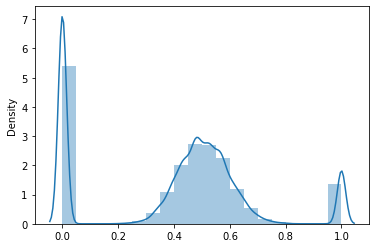

In [132]:
sns.distplot(min_max_data, bins=20);

### power 

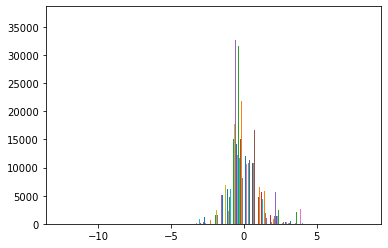

In [133]:
pt = PowerTransformer()
pdata = pt.fit_transform(qtdata)
plt.hist(pdata, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


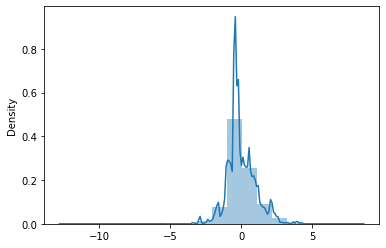

In [134]:
sns.distplot(pdata, bins=20);

### RobustScaler

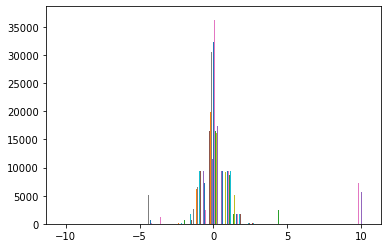

In [135]:
r_scaler = RobustScaler()
r_data = r_scaler.fit_transform(qtdata)
plt.hist(r_data, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


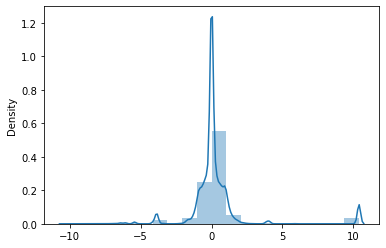

In [136]:
sns.distplot(r_data, bins=20);

### StandardScaler

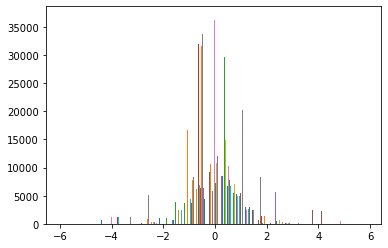

In [137]:
s_scaler  = StandardScaler()
s_data = s_scaler.fit_transform(qtdata)
plt.hist(s_data, bins=25)
plt.show()

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


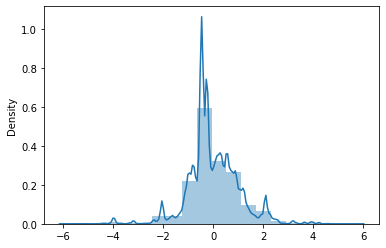

In [138]:
sns.distplot(s_data, bins=20);

# Set New Data

In [224]:
data = pd.DataFrame(min_max_data ,columns=Columns)
data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.0,0.571774,0.419819,0.613249,0.417053,0.620661,0.425324,0.475238,0.476607,0.000000,...,0.523890,0.470972,0.418789,0.469960,0.363294,0.565546,0.366214,0.000000,0.546240,0.335723
1,1.0,0.439244,0.439244,0.561578,0.434149,0.600258,0.395520,0.424670,0.476607,0.000000,...,0.388965,0.470972,0.625412,0.630378,0.488025,0.000000,0.474863,1.000000,0.000000,0.372874
2,1.0,0.439244,0.415288,0.533646,0.405609,0.472986,0.395520,0.424670,0.476607,0.000000,...,0.523890,1.000000,0.342332,0.416350,0.419305,0.000000,0.474863,1.000000,0.000000,0.505795
3,1.0,0.439244,0.529787,0.467160,0.530801,0.474852,0.520174,0.000000,0.476607,0.000000,...,0.597366,0.502534,0.404878,0.469960,0.392643,0.000000,0.474863,1.000000,0.000000,0.474364
4,1.0,0.614637,0.620495,0.384703,0.635284,0.369616,0.601063,0.717022,0.657668,0.000000,...,0.388965,1.000000,0.531145,0.502896,0.573216,0.549243,0.559145,0.378440,0.532329,0.299671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38844,0.0,0.528650,0.479949,0.490605,0.461995,0.494519,0.520174,0.632217,0.476607,0.565242,...,0.523890,0.483267,0.494177,0.502896,0.441437,0.496018,0.474863,0.485589,0.000000,0.526262
38845,0.0,0.571774,0.473111,0.639183,0.454436,0.684646,0.520174,0.632217,0.557117,0.797147,...,0.597366,0.470972,0.539838,0.537614,0.488025,0.517101,1.000000,0.449653,1.000000,0.531819
38846,0.0,0.484490,0.508820,0.478872,0.514167,0.452929,0.628882,0.424670,0.611980,0.565242,...,0.597366,0.399771,0.413736,0.416350,0.392643,0.549243,0.559145,0.378440,0.532329,0.531819
38847,0.0,0.292601,0.559145,0.500529,0.567848,0.502669,0.531946,0.424670,0.476607,0.000000,...,0.466904,0.399771,0.545496,0.502896,0.640104,0.000000,0.474863,1.000000,0.000000,0.460162


In [140]:
data.shape

(38849, 60)

In [141]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,...,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000,38849.000000
mean,0.500376,0.500055,0.491574,0.491570,0.491564,0.491566,0.490751,0.454733,0.437784,0.219875,...,0.491647,0.642089,0.519862,0.471670,0.519384,0.330664,0.503572,0.699979,0.291657,0.500012
std,0.097848,0.094383,0.123205,0.123182,0.123174,0.123174,0.125433,0.191139,0.211735,0.289633,...,0.121026,0.289628,0.150973,0.231345,0.149942,0.321250,0.108460,0.329376,0.300689,0.096259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.435061,0.439244,0.435213,0.435140,0.435061,0.435126,0.425324,0.424670,0.476607,0.000000,...,0.442162,0.446161,0.435103,0.443887,0.441437,0.000000,0.474863,0.438061,0.000000,0.435061
50%,0.500241,0.484490,0.500121,0.500015,0.499879,0.499989,0.491544,0.519066,0.476607,0.000000,...,0.523890,0.502534,0.500013,0.502896,0.488025,0.499906,0.474863,1.000000,0.000000,0.496742
75%,0.564787,0.571774,0.564939,0.564831,0.565090,0.564840,0.568313,0.556256,0.564183,0.565242,...,0.523890,1.000000,0.564932,0.565546,0.573216,0.565546,0.564902,1.000000,0.565242,0.564183
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### After Scaling by Quantile and min-max

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' timedelta', ylabel=' shares'>

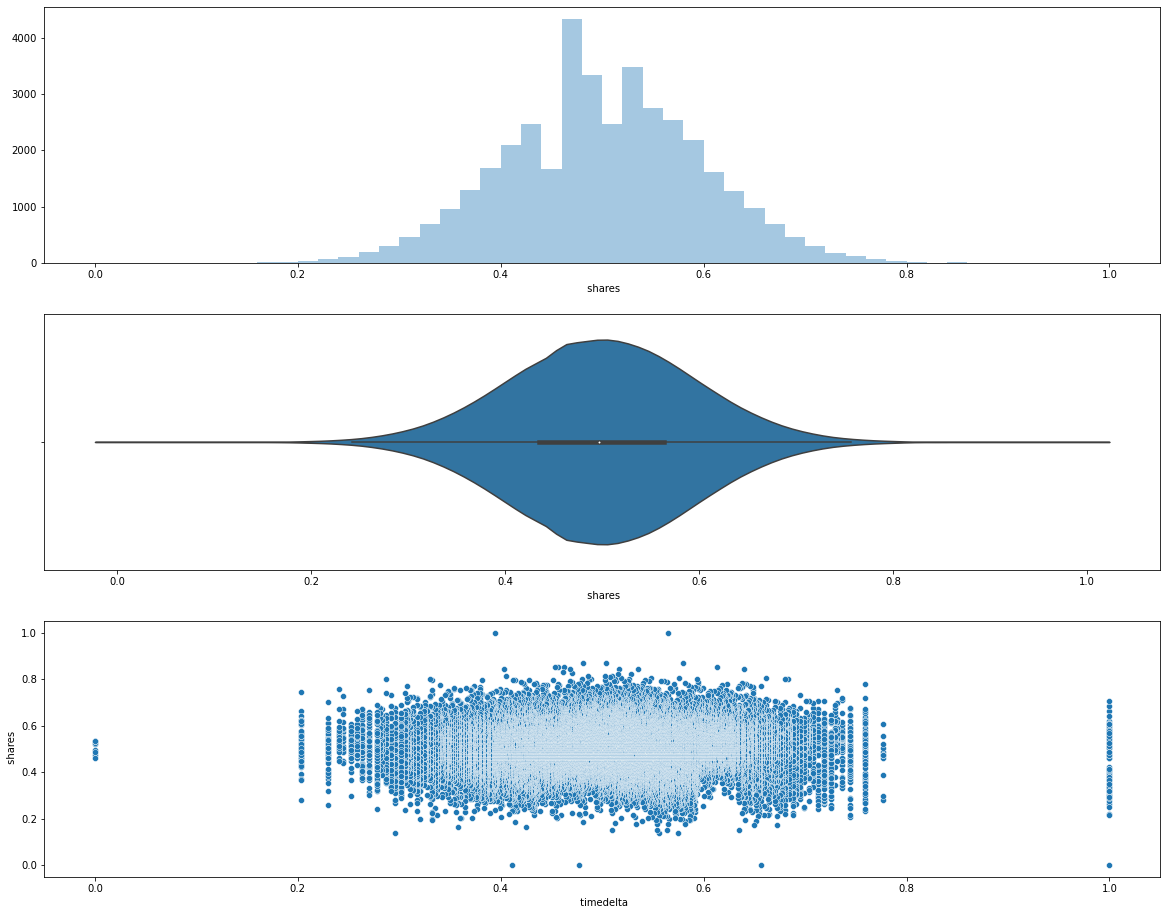

In [142]:
plt.subplots(3,1,figsize=(20,16))
plt.subplot(3,1,1)
sns.distplot(data[' shares'], hist=True, kde=False)
plt.subplot(3,1,2)
sns.violinplot(data[' shares'])
plt.subplot(3,1,3)
sns.scatterplot(data=data, x=' timedelta', y=' shares')

# Train Linear Model

In [226]:
X = data.drop(columns=[" shares"])
y = data[" shares"]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

In [145]:
y_test

1542     0.355572
36052    0.460162
9707     0.474364
12648    0.505795
11787    0.379505
           ...   
8422     0.537094
35400    0.396170
1370     0.505795
24522    0.553981
9753     0.621560
Name:  shares, Length: 12821, dtype: float64

In [146]:
linearModel = LinearRegression()
linearModel.fit(X_train ,y_train)

LinearRegression()

In [147]:
Y_pred = linearModel.predict(X_test)

In [148]:
mean_squared_error(y_test,Y_pred)

0.00785020680204715

In [149]:
r2_score(y_test ,Y_pred)

0.15420224054686105

### Without any pre-processing

In [153]:
X = originData.drop(columns=[" shares"])
y = originData[" shares"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linearModel.fit(X_train ,y_train)

LinearRegression()

In [154]:
Y_pred = linearModel.predict(X_test)
mean_squared_error(y_test,Y_pred)

163042271.47339654

In [155]:
r2_score(y_test ,Y_pred)

0.013436911487878178

### Ridge and Lasso regression.

In [157]:
model = linear_model.Lasso(alpha=.15)
model.fit(X_train ,y_train)

Lasso(alpha=0.15)

In [158]:
Y_pred = model.predict(X_test)
mean_squared_error(y_test,Y_pred)

163040538.36924988

In [159]:
r2_score(y_test ,Y_pred)

0.013447398440520564

In [160]:
model = RidgeCV()
model.fit(X_train ,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [161]:
Y_pred = model.predict(X_test)
Y_pred

array([2756.8224855 , 2886.78706347, 5430.99838637, ..., 4334.16340486,
       2269.28196003, 2345.52185547])

In [162]:
mean_squared_error(y_test,Y_pred)

163037021.42838842

In [163]:
r2_score(y_test ,Y_pred)

0.013468679326802624

# Polynomial Model

In [164]:
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X)
predict = poly.fit_transform(y.array.reshape(-1, 1))

In [165]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, predict, test_size=0.33, random_state=42)

In [166]:
linearModel.fit(X_train ,y_train)

LinearRegression()

In [167]:
y = linearModel.predict(X_test)

In [168]:
mean_squared_error(y_test,y)

0.005272546862958874

In [169]:
r2_score(y_test ,y)

0.42482892634462005

In [170]:
y

array([[1.        , 0.52105713, 0.27960205],
       [1.        , 0.4487915 , 0.21624756],
       [1.        , 0.55603027, 0.31585693],
       ...,
       [1.        , 0.49822998, 0.253479  ],
       [1.        , 0.50366211, 0.26098633],
       [1.        , 0.63500977, 0.40148926]])

In [171]:
linearModel.coef_.shape

(3, 1830)

In [172]:
linearModel.intercept_

array([1.00000000e+00, 4.35602986e+11, 4.70016315e+11])

### PCA

In [178]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### test linear model

In [179]:
model.fit(X_train ,y_train)
Y_pred = model.predict(X_test)
mean_squared_error(y_test,Y_pred)

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


0.007917533123032667

In [180]:
r2_score(y_test ,Y_pred)

0.1469483613972158

### Feature Selection 

In [228]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
X = X_train
y = y_train
names=pd.DataFrame(X_train.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, n_features_to_select=50, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

,0
0,1
1,2
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [229]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 

most_important.count()

myColumn = most_important.Feature

temp = data.drop(columns=myColumn)
cl = temp.columns
featureData = data.drop(columns=cl)

In [230]:
featureData

,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.0,0.419819,0.613249,0.417053,0.620661,0.425324,0.475238,0.476607,0.000000,0.506045,...,0.482286,0.540629,0.467032,0.524977,0.523890,0.418789,0.565546,0.366214,0.000000,0.546240
1,1.0,0.439244,0.561578,0.434149,0.600258,0.395520,0.424670,0.476607,0.000000,0.584188,...,0.503964,0.515877,0.491423,0.413503,0.388965,0.625412,0.000000,0.474863,1.000000,0.000000
2,1.0,0.415288,0.533646,0.405609,0.472986,0.395520,0.424670,0.476607,0.000000,0.405529,...,0.433843,0.606239,0.405999,0.650957,0.523890,0.342332,0.000000,0.474863,1.000000,0.000000
3,1.0,0.529787,0.467160,0.530801,0.474852,0.520174,0.000000,0.476607,0.000000,0.409031,...,0.555554,0.472358,0.535281,0.533985,0.597366,0.404878,0.000000,0.474863,1.000000,0.000000
4,1.0,0.620495,0.384703,0.635284,0.369616,0.601063,0.717022,0.657668,0.000000,0.506876,...,0.464911,0.609933,0.402921,0.564967,0.388965,0.531145,0.549243,0.559145,0.378440,0.532329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38844,0.0,0.479949,0.490605,0.461995,0.494519,0.520174,0.632217,0.476607,0.565242,0.451267,...,0.490696,0.508093,0.499155,0.468363,0.523890,0.494177,0.496018,0.474863,0.485589,0.000000
38845,0.0,0.473111,0.639183,0.454436,0.684646,0.520174,0.632217,0.557117,0.797147,0.409259,...,0.429968,0.572573,0.436719,0.519820,0.597366,0.539838,0.517101,1.000000,0.449653,1.000000
38846,0.0,0.508820,0.478872,0.514167,0.452929,0.628882,0.424670,0.611980,0.565242,0.636228,...,0.592005,0.423517,0.586867,0.436664,0.597366,0.413736,0.549243,0.559145,0.378440,0.532329
38847,0.0,0.559145,0.500529,0.567848,0.502669,0.531946,0.424670,0.476607,0.000000,0.604172,...,0.579840,0.371708,0.648666,0.365733,0.466904,0.545496,0.000000,0.474863,1.000000,0.000000


In [231]:
X = featureData
y = data[" shares"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

linearModel = LinearRegression()
linearModel.fit(X_train ,y_train)
Y_pred = linearModel.predict(X_test)
mean_squared_error(y_test,Y_pred)

0.007852954473998523

In [232]:
r2_score(y_test ,Y_pred)

0.1539062006031009